<a href="https://colab.research.google.com/github/cesong2/Display-Sensor/blob/Jinsup/AI4I_2020_Jinsup_230220_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 전체 DATA 전처리 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc('font', family='NanumBarunGothic') 

In [2]:
df = pd.read_csv('./ai4i2020.csv')

In [ ]:
df.head(3)

In [ ]:
df.info()

In [ ]:
# 전체 데이터 갯수, 평균 등 파악  
df.describe()

In [3]:
# 변수 컬럼명 변경
# 변수 단위 Air temperature (켈빈온도), Process temperature (켈빈온도), 
# Rotational speed (분당회전수), Torque (회전력/Nm:뉴턴미터) Tool wear (공구 마모 시간/분)
df.rename(columns={'Air temperature [K]':'Air temperature',
                   'Process temperature [K]':'Process temperature',
                   'Rotational speed [rpm]':'Rotational speed',
                   'Torque [Nm]':'Torque',
                   'Tool wear [min]':'Tool wear'},inplace=True)
df.head(3)

,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0


In [4]:
# 불필요한 컬럼 (제품번호 등) 제거 
# process temp 은 ait temp 에 10도를 더한 값이나 분석에 필요할 것으로 생각되어 제거하지 않음 
df.drop(['UDI','Product ID'], axis=1, inplace=True)

In [5]:
# 온도 단위 변경 / 캘빈 -> 섭씨 / 소수점 1자리
df['Air temperature']=df['Air temperature'].apply(lambda x: x- 273.15).round(1)
df['Process temperature']=df['Process temperature'].apply(lambda x: x- 273.15).round(1)
df.head(3)

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,25.0,35.5,1551,42.8,0,0,0,0,0,0,0
1,L,25.1,35.6,1408,46.3,3,0,0,0,0,0,0
2,L,25.0,35.4,1498,49.4,5,0,0,0,0,0,0


## 2. failure 유,무 DATA 전처리
     * 삭제 항목 : Machine failue 분류 중 failure 유형 없는 9,
       TWF 유형 분류된 46개 (공구 마모로 인한 고장)
       RNF 로 분류된 19개 중 18개(1개는 TWF 와 중복)
    *  삭제 항목 중 Machine failue 분류 중 failure 유형 없는 9 과
       RNF 로 분류된 19개은 별도로 분석함  


In [ ]:
# failure 유무 별 데이터 갯수, 평균 등 파악  
df.groupby('Machine failure').describe()

In [6]:
# failure 유형별 분석을 위한 Data 생성
df_TWF = df.loc[df['TWF'] == 1].copy()
df_HDF = df.loc[df['HDF'] == 1].copy()
df_PWF = df.loc[df['PWF'] == 1].copy()
df_OSF = df.loc[df['OSF'] == 1].copy()
df_RNF = df.loc[df['RNF'] == 1].copy()

In [7]:
# Machine failure 중 failure 유형이 없는 데이터 9개 확인 및 생성 
print(df[(df['Machine failure']==1) & (df['TWF']==0) & (df['HDF']==0) & (df['PWF']==0) & (df['OSF']==0) & (df['RNF']==0)].copy()) 

     Type  Air temperature  Process temperature  Rotational speed  Torque  \
1437    H             25.7                 36.8              1439    45.2   
2749    M             26.6                 36.1              1685    28.9   
4044    M             28.8                 37.8              1419    47.7   
4684    M             30.5                 38.7              1421    44.8   
5536    M             29.2                 38.7              1363    54.0   
5941    L             27.5                 37.6              1438    48.5   
6478    L             27.4                 36.7              1663    29.1   
8506    L             25.2                 36.5              1710    27.3   
9015    L             24.1                 35.0              1431    49.7   

      Tool wear  Machine failure  TWF  HDF  PWF  OSF  RNF  
1437         40                1    0    0    0    0    0  
2749        179                1    0    0    0    0    0  
4044         20                1    0    0    0  

In [10]:
# failure 분석 Data 생성 (failure 유형이 없는 데이터 9개 삭제)
df_failure = df.drop(df[(df['Machine failure']==1) & (df['TWF']==0) & (df['HDF']==0) & (df['PWF']==0) & (df['OSF']==0) & (df['RNF']==0)].index)
df_failure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9991 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 9991 non-null   object 
 1   Air temperature      9991 non-null   float64
 2   Process temperature  9991 non-null   float64
 3   Rotational speed     9991 non-null   int64  
 4   Torque               9991 non-null   float64
 5   Tool wear            9991 non-null   int64  
 6   Machine failure      9991 non-null   int64  
 7   TWF                  9991 non-null   int64  
 8   HDF                  9991 non-null   int64  
 9   PWF                  9991 non-null   int64  
 10  OSF                  9991 non-null   int64  
 11  RNF                  9991 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1014.7+ KB


In [11]:
# 분석에서 제외할 TWF 공구 마모 failure 46개, RNF 랜덤 failure 19개 데이터 파악
df_failure.groupby('Machine failure').sum()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
Machine failure,,,,,,,,,,
0,259525.7,356341.9,14880452,382862.1,1030768,0,0,0,0,18
1,9169.7,12269.6,493740,16631.8,47687,46,115,95,98,1


In [12]:
# failure 분석을 위한 Data 생성 (TWF, RNF 삭제)
# RNF 데이터 총 19개 이나 TWF 행 데이터 제거시 RNF 데이터 1개 같이 삭제되어 18개만 삭제  
df_failure = df_failure.drop(df_failure[(df_failure['TWF']==1) | (df_failure['RNF']==1)].index)
df_failure.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9927 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 9927 non-null   object 
 1   Air temperature      9927 non-null   float64
 2   Process temperature  9927 non-null   float64
 3   Rotational speed     9927 non-null   int64  
 4   Torque               9927 non-null   float64
 5   Tool wear            9927 non-null   int64  
 6   Machine failure      9927 non-null   int64  
 7   TWF                  9927 non-null   int64  
 8   HDF                  9927 non-null   int64  
 9   PWF                  9927 non-null   int64  
 10  OSF                  9927 non-null   int64  
 11  RNF                  9927 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1008.2+ KB


In [13]:
# TWF, RNF 컬럼 삭제
df_failure.drop(['TWF', 'RNF'], axis= 1, inplace=True)

In [14]:
#failre 별 합계 컬럼 생성
df_failure['Failure Total'] = df['HDF'] + df['PWF'] + df['OSF']
df_failure.head(3)  

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,HDF,PWF,OSF,Failure Total
0,M,25.0,35.5,1551,42.8,0,0,0,0,0,0
1,L,25.1,35.6,1408,46.3,3,0,0,0,0,0
2,L,25.0,35.4,1498,49.4,5,0,0,0,0,0


## 2-1 Machine failure 발생 데이터 추출 및 분석 

In [15]:
# 전체 데이터 중 failue 비중 
df_mf =df_failure.groupby('Machine failure')
df_count = df_mf.count()
df_count['count'] =  df_count['Type']
df_count.index= ['Non- failure','Failure']

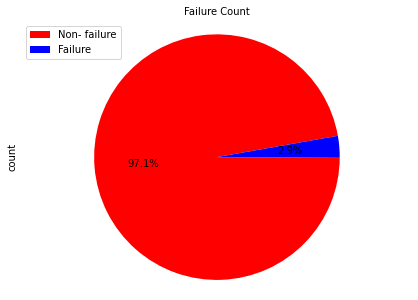

In [16]:
df_count['count'].plot(kind='pie', figsize=(7,5), autopct='%1.1f%%', startangle=10, colors=['red', 'blue' ,'green'], labels=None) 
plt.title('Failure Count', size=10)
plt.axis('equal')
plt.legend(labels=df_count.index, loc = 'upper left')
plt.show()

In [17]:
# failure 없는 그룹 생성
df_fail_0=df_mf.get_group(0)

In [18]:
df_fail_0.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,HDF,PWF,OSF,Failure Total
count,9643.000000,9643.000000,9643.000000,9643.000000,9643.000000,9643.0,9643.0,9643.0,9643.0,9643.0
mean,26.861755,36.883138,1540.354869,39.622389,106.669086,0.0,0.0,0.0,0.0,0.0
std,1.991531,1.486919,167.471848,9.468446,62.936149,0.0,0.0,0.0,0.0,0.0
min,22.200000,32.600000,1168.000000,12.600000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,25.200000,35.700000,1429.000000,33.100000,52.000000,0.0,0.0,0.0,0.0,0.0
50%,26.900000,36.900000,1507.000000,39.800000,107.000000,0.0,0.0,0.0,0.0,0.0
75%,28.200000,38.000000,1615.000000,46.300000,160.000000,0.0,0.0,0.0,0.0,0.0
max,31.400000,40.700000,2695.000000,70.000000,246.000000,0.0,0.0,0.0,0.0,0.0


In [19]:
# failure 있는 그룹 생성
df_fail_1=df_mf.get_group(1)

In [20]:
 df_fail_1.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,HDF,PWF,OSF,Failure Total
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.0,284.000000,284.000000,284.000000,284.000000
mean,27.884859,37.201056,1484.845070,52.434155,132.866197,1.0,0.404930,0.330986,0.334507,1.070423
std,2.077224,1.349165,410.845724,16.379296,72.011457,0.0,0.491745,0.471399,0.472651,0.256309
min,22.500000,33.000000,1181.000000,3.800000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,26.000000,36.675000,1318.500000,49.075000,68.500000,1.0,0.000000,0.000000,0.000000,1.000000
50%,28.700000,37.200000,1356.000000,55.550000,145.000000,1.0,0.000000,0.000000,0.000000,1.000000
75%,29.500000,38.100000,1379.250000,62.325000,202.000000,1.0,1.000000,1.000000,1.000000,1.000000
max,30.900000,40.100000,2886.000000,76.600000,251.000000,1.0,1.000000,1.000000,1.000000,2.000000


## 2-2 failure 발생 유형과 변수간의 상관관계 분석 

In [21]:
# failure Total 과 5가지 변수들의 상관 관계 분석
df_fail_1[['Failure Total','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']].corr( ) 

,Failure Total,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
Failure Total,1.000000,0.006656,-0.034959,-0.107577,0.215151,0.209763
Air temperature,0.006656,1.000000,0.851802,-0.140385,-0.018464,-0.218852
Process temperature,-0.034959,0.851802,1.000000,-0.080533,-0.006147,-0.101832
Rotational speed,-0.107577,-0.140385,-0.080533,1.000000,-0.910502,-0.159911
Torque,0.215151,-0.018464,-0.006147,-0.910502,1.000000,0.118940
Tool wear,0.209763,-0.218852,-0.101832,-0.159911,0.118940,1.000000


In [22]:
data_failure_Total = df_fail_1[['Failure Total','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']]

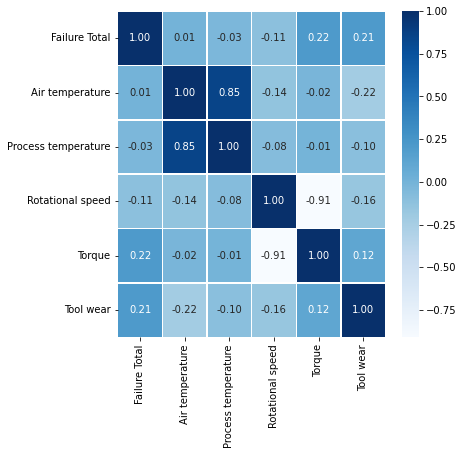

In [23]:
# failure Total 상관 관계 heatmap 
plt.figure(figsize=(6,6))
sns.heatmap(data = data_failure_Total.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

Text(0.5, 1.0, 'Machine failure')

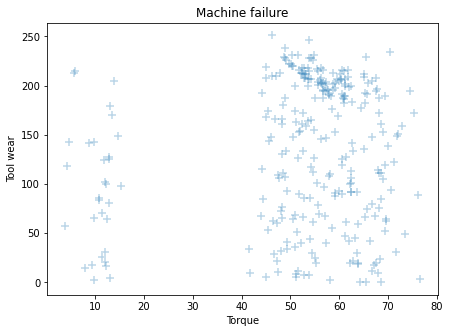

In [24]:
# failure 발생 주요 요인 산점도 분석 (Torque, Tool wear)
df_fail_1.plot(kind='scatter', x='Torque', y='Tool wear', marker = '+', cmap = 'viridis', s=50, alpha=0.3, figsize=(7,5)) 
plt.xlabel('Torque') 
plt.title('Machine failure')

In [25]:
# HDF(heat dissipation) 와 5가지 변수들의 상관 관계 분석 
# -> 공기 온도,  회전력에 영향  
df_fail_1[['HDF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']].corr( ) 

,HDF,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
HDF,1.000000,0.619706,0.289625,-0.296847,0.036971,-0.294631
Air temperature,0.619706,1.000000,0.851802,-0.140385,-0.018464,-0.218852
Process temperature,0.289625,0.851802,1.000000,-0.080533,-0.006147,-0.101832
Rotational speed,-0.296847,-0.140385,-0.080533,1.000000,-0.910502,-0.159911
Torque,0.036971,-0.018464,-0.006147,-0.910502,1.000000,0.118940
Tool wear,-0.294631,-0.218852,-0.101832,-0.159911,0.118940,1.000000


In [26]:
data_HDF = df_fail_1[['HDF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']]

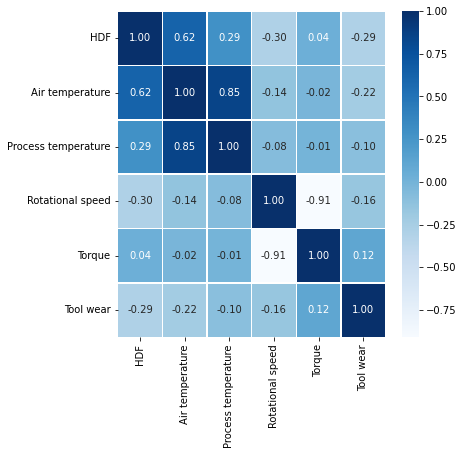

In [27]:
# HDF 상관 관계 heatmap 
plt.figure(figsize=(6,6))
sns.heatmap(data = data_HDF.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

Text(0.5, 0, 'Torque')

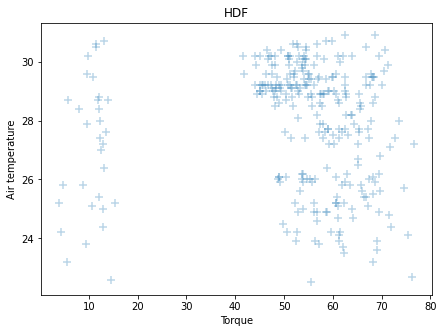

In [28]:
# HDF 주요 요인 산점도 분석 (Torque, Air temperature)
df_fail_1.plot(kind='scatter', x='Torque', y='Air temperature', marker = '+', cmap = 'viridis', s=50, alpha=0.3, figsize=(7,5)) 
plt.title('HDF')
plt.xlabel('Torque')

In [29]:
# PWF(power failure) 와 5가지 변수들의 상관 관계 분석 
# -> 회전수 와 양의 관계 회전력과는 상관없음
df_fail_1[['PWF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']].corr( ) 

,PWF,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
PWF,1.000000,-0.315671,-0.188344,0.486005,-0.176290,-0.314198
Air temperature,-0.315671,1.000000,0.851802,-0.140385,-0.018464,-0.218852
Process temperature,-0.188344,0.851802,1.000000,-0.080533,-0.006147,-0.101832
Rotational speed,0.486005,-0.140385,-0.080533,1.000000,-0.910502,-0.159911
Torque,-0.176290,-0.018464,-0.006147,-0.910502,1.000000,0.118940
Tool wear,-0.314198,-0.218852,-0.101832,-0.159911,0.118940,1.000000


In [30]:
data_PWF = df_fail_1[['PWF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']]

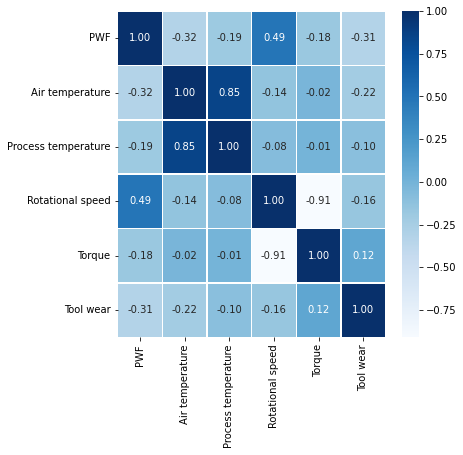

In [31]:
# PWF 상관 관계 heatmap 
plt.figure(figsize=(6,6))
sns.heatmap(data = data_PWF.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

Text(0.5, 0, 'Torque')

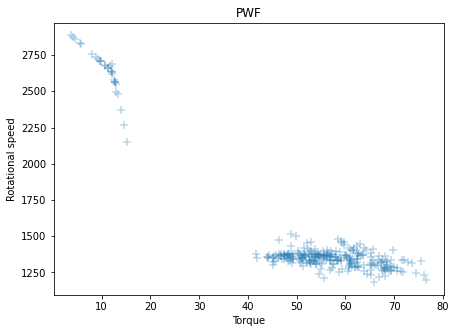

In [32]:
# PWF 주요 요인 산점도 분석 (Rotational speed, Torque)
df_fail_1.plot(kind='scatter', x='Torque', y='Rotational speed', marker = '+', cmap = 'viridis', s=50, alpha=0.3, figsize=(7,5)) 
plt.title('PWF')
plt.xlabel('Torque')

In [33]:
# OSF(overstrain failure) 와 5가지 변수들의 상관 관계 분석 
# -> 회전력과 공구 마모 시간(TWF 0.395 보다 높음) 영향 
df_fail_1[['OSF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']].corr( ) 

,OSF,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
OSF,1.000000,-0.326297,-0.132438,-0.234216,0.254031,0.733650
Air temperature,-0.326297,1.000000,0.851802,-0.140385,-0.018464,-0.218852
Process temperature,-0.132438,0.851802,1.000000,-0.080533,-0.006147,-0.101832
Rotational speed,-0.234216,-0.140385,-0.080533,1.000000,-0.910502,-0.159911
Torque,0.254031,-0.018464,-0.006147,-0.910502,1.000000,0.118940
Tool wear,0.733650,-0.218852,-0.101832,-0.159911,0.118940,1.000000


In [34]:
data_OSF = df_fail_1[['OSF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']]

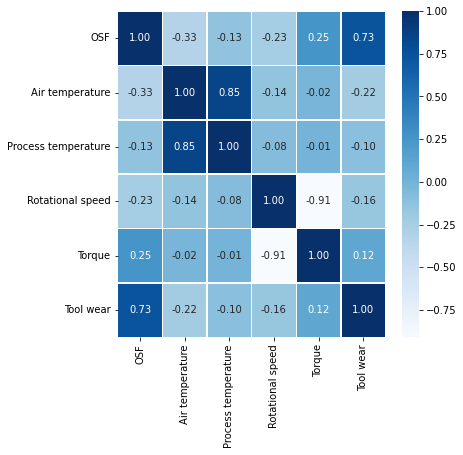

In [35]:
# OSF 상관 관계 heatmap 
plt.figure(figsize=(6,6))
sns.heatmap(data = data_OSF.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

Text(0.5, 0, 'Torque')

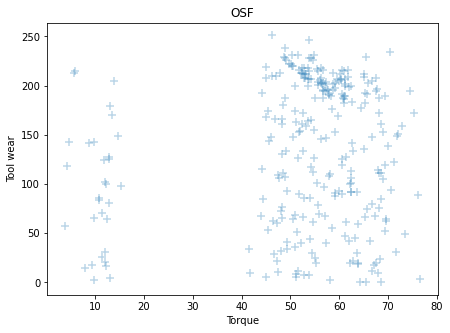

In [36]:
# OSF 주요 요인 산점도 분석 (Tool wear, Torque)
df_fail_1.plot(kind='scatter', x='Torque', y='Tool wear', marker = '+', cmap = 'viridis', s=50, alpha=0.3, figsize=(7,5)) 
plt.title('OSF')
plt.xlabel('Torque')

## 3. 랜덤 고장 (RNF) 요인 분석

In [37]:
# Machine failure 중 failure 유형이 없는 데이터 9개 생성 
df_failure_add = df[(df['Machine failure']==1) & (df['TWF']==0) & (df['HDF']==0) & (df['PWF']==0) & (df['OSF']==0) & (df['RNF']==0)].copy()
df_failure_add

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
1437,H,25.7,36.8,1439,45.2,40,1,0,0,0,0,0
2749,M,26.6,36.1,1685,28.9,179,1,0,0,0,0,0
4044,M,28.8,37.8,1419,47.7,20,1,0,0,0,0,0
4684,M,30.5,38.7,1421,44.8,101,1,0,0,0,0,0
5536,M,29.2,38.7,1363,54.0,119,1,0,0,0,0,0
5941,L,27.5,37.6,1438,48.5,78,1,0,0,0,0,0
6478,L,27.4,36.7,1663,29.1,145,1,0,0,0,0,0
8506,L,25.2,36.5,1710,27.3,163,1,0,0,0,0,0
9015,L,24.1,35.0,1431,49.7,210,1,0,0,0,0,0


In [38]:
# df_failure_add 데이터 값 수정 (Machine failure : 1 -> 0 / RNF : 0 -> 1) 
df_failure_add['Machine failure'].replace(1,0, inplace = True)
df_failure_add['RNF'].replace(0,1, inplace = True)
df_failure_add

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
1437,H,25.7,36.8,1439,45.2,40,0,0,0,0,0,1
2749,M,26.6,36.1,1685,28.9,179,0,0,0,0,0,1
4044,M,28.8,37.8,1419,47.7,20,0,0,0,0,0,1
4684,M,30.5,38.7,1421,44.8,101,0,0,0,0,0,1
5536,M,29.2,38.7,1363,54.0,119,0,0,0,0,0,1
5941,L,27.5,37.6,1438,48.5,78,0,0,0,0,0,1
6478,L,27.4,36.7,1663,29.1,145,0,0,0,0,0,1
8506,L,25.2,36.5,1710,27.3,163,0,0,0,0,0,1
9015,L,24.1,35.0,1431,49.7,210,0,0,0,0,0,1


In [ ]:
# df_RNF 데이터 값 수정 (Machine failure : 1 -> 0 / TWF : 1 -> 0) 
df_RNF['Machine failure'].replace(1,0, inplace = True)
df_RNF['TWF'].replace(1,0, inplace = True)
df_RNF

In [ ]:
# RNF 데이터에 더해 합치기 (28개 = 9 +19) / failure 발생 전체와의 상관관계 분석을 위한 HDF, PWF,OSF 데이터도 합침  
df_RNF_add = pd.concat([df_RNF, df_failure_add,df_HDF,df_PWF,df_OSF,])
df_RNF_add

In [41]:
# 전체 평균값 산출 
# 랜덤 고장 발생은 평균적으로 공정 온도 37도, 회전속도 1,474 RPM, Torque 52 Nm, 공구마모 시간 136분 에 발생함    
df_RNF_add.mean()

<ipython-input-41-a2f5cb0a918b>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_RNF_add.mean()


Air temperature          27.852083
Process temperature      37.215179
Rotational speed       1474.636905
Torque                   52.525000
Tool wear               136.250000
Machine failure           0.916667
TWF                       0.011905
HDF                       0.369048
PWF                       0.327381
OSF                       0.345238
RNF                       0.083333
dtype: float64

In [42]:
# Type 별 Tool ware 의 평균 값 
# 랜덤 고장 발생 시 공구마모의 Type 별 평균 시간은 H타입 52분, M타입 107분, L타입 147분 이며
# 나머지 발생 시 공구마모의 Type 별 평균 시간은  H타입 124분, M타입 119분, L타입 144분 으로 
# H타입 (공정 시간 5분 소요) 의 경우 평균 72분 정도 빨리 고장 발생되었음을 알 수 있음 
RNF_tabl1 = pd.pivot_table(df_RNF_add, index='RNF', columns='Type', values= 'Tool wear',aggfunc='mean',margins=True)
RNF_tabl1

Type,H,L,M,All
RNF,,,,
0,124.333333,144.292793,119.183099,137.532468
1,52.200000,147.823529,107.666667,122.142857
All,106.300000,144.543933,118.285714,136.250000


In [43]:
# RNF와 5가지 변수들의 상관 관계 분석  -> Process temperature, Rotational speed 양의 상관관계 
df_RNF_add[['RNF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']].corr( ) 

,RNF,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
RNF,1.000000,-0.044424,0.059959,0.013971,-0.179222,-0.059621
Air temperature,-0.044424,1.000000,0.848567,-0.138007,-0.009672,-0.200068
Process temperature,0.059959,0.848567,1.000000,-0.081914,-0.010878,-0.103164
Rotational speed,0.013971,-0.138007,-0.081914,1.000000,-0.887700,-0.164072
Torque,-0.179222,-0.009672,-0.010878,-0.887700,1.000000,0.140192
Tool wear,-0.059621,-0.200068,-0.103164,-0.164072,0.140192,1.000000


In [44]:
data_RNF = df_RNF_add[['RNF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']]

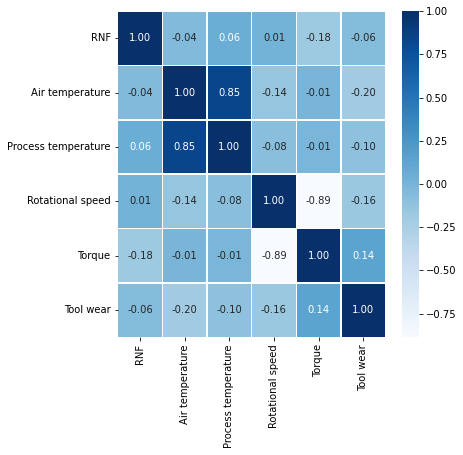

In [45]:
# RNF 상관 관계 heatmap 
plt.figure(figsize=(6,6))
sns.heatmap(data = data_RNF.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## 4. Type 별 failure 데이터 분석

In [46]:
# type 별 데이터 갯수, 평균 등 파악  
df.groupby('Type').describe()

Air temperature                                                     \
               count       mean       std   min   25%   50%   75%   max   
Type                                                                      
H             1003.0  26.756530  2.023200  22.4  25.1  26.7  28.2  31.1   
L             6000.0  26.904467  1.987958  22.2  25.2  27.0  28.4  31.4   
M             2997.0  26.919186  2.017352  22.2  25.2  27.0  28.5  31.2   

     Process temperature             ...  OSF          RNF            \
                   count       mean  ...  75%  max   count      mean   
Type                                 ...                               
H                 1003.0  36.814158  ...  0.0  1.0  1003.0  0.003988   
L                 6000.0  36.901283  ...  0.0  1.0  6000.0  0.002167   
M                 2997.0  36.907941  ...  0.0  1.0  2997.0  0.000667   

                                         
           std  min  25%  50%  75%  max  
Type                                     
H     0.063056  0.0  0.0  0.0  0.0  1.0  
L     0.046501  0.0  0.0  0.0  0.0  1.0  
M     0.025828  0.0  0.0  0.0  0.0  1.0  

[3 rows x 88 columns]

In [47]:
# Type 별 failure 발생 여부 별 갯수 비교
df_table1 = pd.pivot_table(df_failure, index=['Machine failure','Failure Total'],columns='Type',values='Torque', aggfunc='count', fill_value=0, margins = True)
df_table1  

Type                             H     L     M   All
Machine failure Failure Total                       
0               0              978  5753  2912  9643
1               1               13   190    61   264
                2                0    16     4    20
All                            991  5959  2977  9927

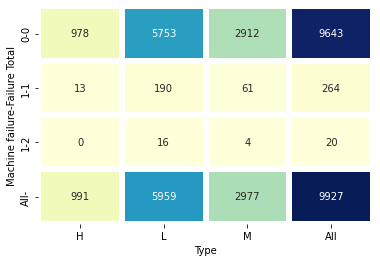

In [48]:
# heat map (Type 별 failure 발생 여부 별 갯수)
sns.heatmap(df_table1, annot=True, fmt='d', cmap='YlGnBu', linewidth=5, cbar = False)  
plt.show()

In [49]:
# failue = 0 의 failure Total type 별 비중 
df_fail_0_count = df_fail_0.groupby('Type').count()
df_fail_0_count['count'] =  df_fail_0_count['Torque']
df_fail_0_count.index= ['H-type','L-type','M-type']

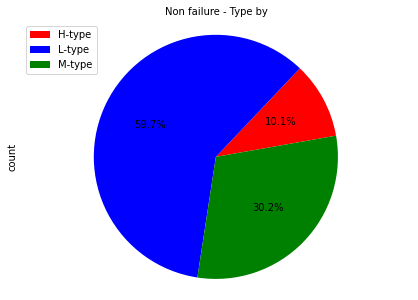

In [50]:
df_fail_0_count['count'].plot(kind='pie', figsize=(7,5), autopct='%1.1f%%', startangle=10, colors=['red', 'blue' ,'green'], labels=None) 
plt.title('Non failure - Type by', size=10)
plt.axis('equal')
plt.legend(labels=df_fail_0_count.index, loc = 'upper left')
plt.show()

In [51]:
# failue = 1 의 failure Total type 별 비중
df_fail_1_count = df_fail_1.groupby('Type').count()
df_fail_1_count['count'] =  df_fail_1_count['Torque']
df_fail_1_count.index= ['H-type','L-type','M-type']

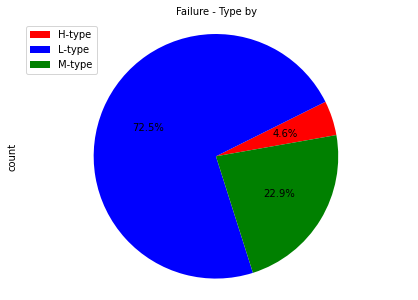

In [52]:
df_fail_1_count['count'].plot(kind='pie', figsize=(7,5), autopct='%1.1f%%', startangle=10, colors=['red', 'blue' ,'green'], labels=None) 
plt.title('Failure - Type by', size=10)
plt.axis('equal')
plt.legend(labels=df_fail_1_count.index, loc = 'upper left')
plt.show()